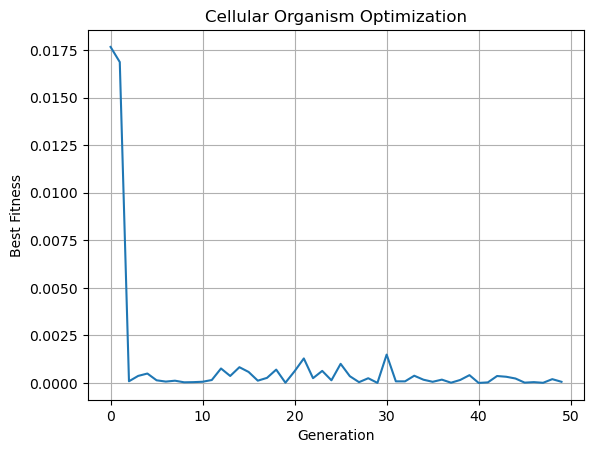

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function to minimize (Sphere function)
def objective_function(x):
    return sum([xi**2 for xi in x])

# Mutation function
def mutate(x, mutation_rate=0.1):
    return [xi + mutation_rate * np.random.randn() for xi in x]

# Update rule: pick best neighbor and mutate
def update_cell(cell, neighbors, mutation_rate=0.1):
    best_neighbor = min(neighbors, key=objective_function)
    new_cell = mutate(best_neighbor, mutation_rate)
    return new_cell

# Initialize grid with random vectors
def initialize_grid(grid_size, dimensions):
    return [[np.random.uniform(-5, 5, dimensions).tolist() for _ in range(grid_size)] for _ in range(grid_size)]

# Get neighbors with wrap-around (toroidal)
def get_neighbors(grid, i, j):
    neighbors = []
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            ni, nj = (i + di) % len(grid), (j + dj) % len(grid[0])
            if ni != i or nj != j:
                neighbors.append(grid[ni][nj])
    return neighbors

# Evolve grid for one generation
def evolve(grid, mutation_rate=0.1):
    new_grid = []
    for i in range(len(grid)):
        row = []
        for j in range(len(grid[i])):
            neighbors = get_neighbors(grid, i, j)
            new_cell = update_cell(grid[i][j], neighbors, mutation_rate)
            row.append(new_cell)
        new_grid.append(row)
    return new_grid

# Run simulation
def run_simulation(grid_size=10, dimensions=2, generations=50, mutation_rate=0.1):
    grid = initialize_grid(grid_size, dimensions)
    best_scores = []

    for gen in range(generations):
        grid = evolve(grid, mutation_rate)
        best_score = min([objective_function(cell) for row in grid for cell in row])
        best_scores.append(best_score)

    # Plot best score over generations
    plt.plot(best_scores)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("Cellular Organism Optimization")
    plt.grid(True)
    plt.show()

# Run it!
run_simulation()


Generation 1: Best Score = 0.0484, Best Cell = [0.104 0.194]
Generation 10: Best Score = 0.0002, Best Cell = [-0.001  0.013]
Generation 20: Best Score = 0.0001, Best Cell = [ 0.012 -0.003]
Generation 30: Best Score = 0.0006, Best Cell = [-0.025 -0.004]
Generation 40: Best Score = 0.0003, Best Cell = [-0.016  0.004]
Generation 50: Best Score = 0.0002, Best Cell = [-0.011 -0.008]


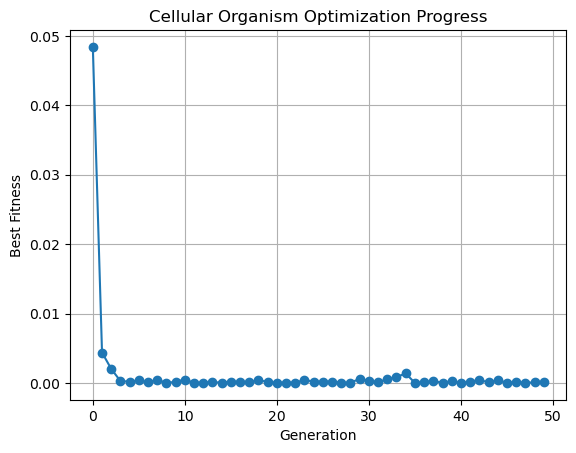

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function to minimize (Sphere function)
def objective_function(x):
    return sum([xi**2 for xi in x])

# Mutation function
def mutate(x, mutation_rate=0.1):
    return [xi + mutation_rate * np.random.randn() for xi in x]

# Update rule: pick best neighbor and mutate
def update_cell(cell, neighbors, mutation_rate=0.1):
    best_neighbor = min(neighbors, key=objective_function)
    new_cell = mutate(best_neighbor, mutation_rate)
    return new_cell

# Initialize grid with random vectors
def initialize_grid(grid_size, dimensions):
    return [[np.random.uniform(-5, 5, dimensions).tolist() for _ in range(grid_size)] for _ in range(grid_size)]

# Get neighbors with wrap-around (toroidal)
def get_neighbors(grid, i, j):
    neighbors = []
    for di in [-1, 0, 1]:
        for dj in [-1, 0, 1]:
            ni, nj = (i + di) % len(grid), (j + dj) % len(grid[0])
            if ni != i or nj != j:
                neighbors.append(grid[ni][nj])
    return neighbors

# Evolve grid for one generation
def evolve(grid, mutation_rate=0.1):
    new_grid = []
    for i in range(len(grid)):
        row = []
        for j in range(len(grid[i])):
            neighbors = get_neighbors(grid, i, j)
            new_cell = update_cell(grid[i][j], neighbors, mutation_rate)
            row.append(new_cell)
        new_grid.append(row)
    return new_grid

# Run simulation with step-10 printing
def run_simulation(grid_size=10, dimensions=2, generations=50, mutation_rate=0.1):
    grid = initialize_grid(grid_size, dimensions)
    best_scores = []

    for gen in range(generations):
        grid = evolve(grid, mutation_rate)
        all_cells = [cell for row in grid for cell in row]
        best_cell = min(all_cells, key=objective_function)
        best_score = objective_function(best_cell)
        best_scores.append(best_score)

        # Print every 10 generations
        if (gen + 1) % 10 == 0 or gen == 0:
            print(f"Generation {gen+1}: Best Score = {best_score:.4f}, Best Cell = {np.round(best_cell, 3)}")

    # Plot best score over generations
    plt.plot(best_scores, marker='o', linestyle='-')
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("Cellular Organism Optimization Progress")
    plt.grid(True)
    plt.show()

# Run it!
run_simulation()
